In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

In [2]:
#Loaded Data
mc = pd.read_csv("mallcustomers.csv")
print(mc.head())

   CustomerID  Gender  Age      Income  SpendingScore
0           1    Male   19  15,000 USD             39
1           2    Male   21  15,000 USD             81
2           3  Female   20  16,000 USD              6
3           4  Female   23  16,000 USD             77
4           5  Female   31  17,000 USD             40


In [3]:
# Converted substings to numeric values in Income column
mc['Income'] = mc['Income'].astype(str).str.replace(',', '').str.replace('USD', '').astype(float)
print(mc['Income'].head())

0    15000.0
1    15000.0
2    16000.0
3    16000.0
4    17000.0
Name: Income, dtype: float64


In [4]:
#Viewed Columns
print(mc.columns)

Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')


In [5]:
# Dropped CustomerID column
mc = mc.drop(columns=['CustomerID'])
print(mc.columns)

Index(['Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')


In [6]:
# Summary statisitcs for Income and SpendingScore
print(mc[['Income', 'SpendingScore']].describe())

              Income  SpendingScore
count     200.000000     200.000000
mean    60560.000000      50.200000
std     26264.721165      25.823522
min     15000.000000       1.000000
25%     41500.000000      34.750000
50%     61500.000000      50.000000
75%     78000.000000      73.000000
max    137000.000000      99.000000


In [7]:
# Normalize numerical features/fit and transform data
from sklearn.preprocessing import StandardScaler

features_to_normalize = ['Income', 'SpendingScore']

scaler = StandardScaler()
mc_scaled = scaler.fit_transform(mc[features_to_normalize])

mc_normalized = pd.DataFrame(mc_scaled, columns=features_to_normalize)

print(mc_normalized.head())

     Income  SpendingScore
0 -1.738999      -0.434801
1 -1.738999       1.195704
2 -1.700830      -1.715913
3 -1.700830       1.040418
4 -1.662660      -0.395980


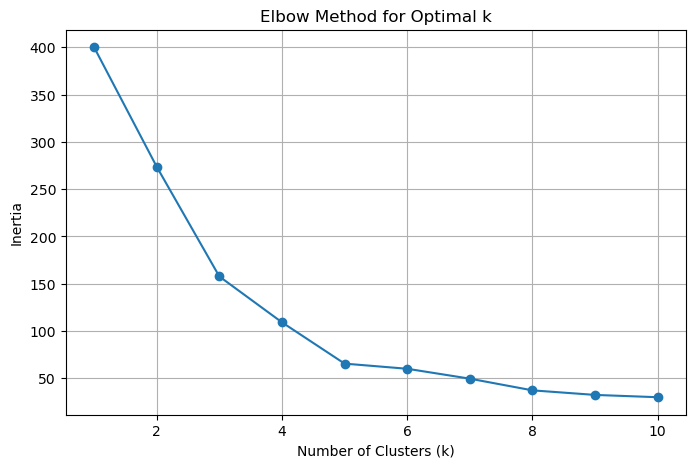

In [8]:
# Elbow Method for Clustering
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.cluster import KMeans

X = mc_normalized 

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [9]:
# Determine optimal number of clustering
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
mc['Cluster'] = kmeans.fit_predict(X)

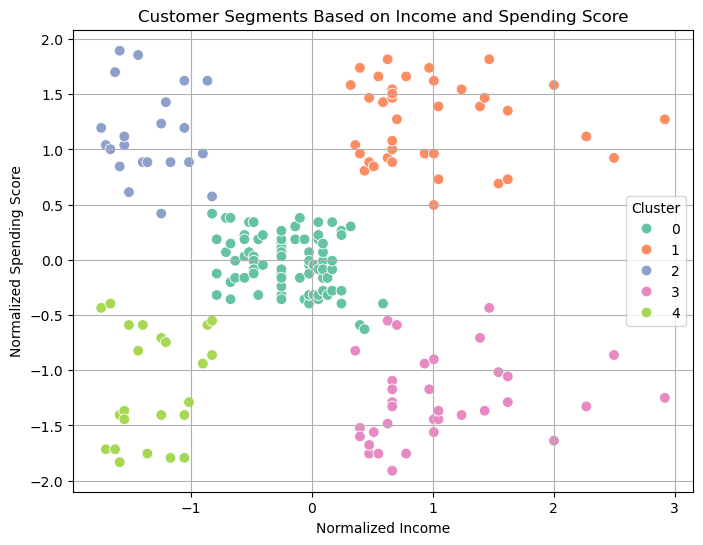

In [10]:
# Visualized customer clusters
import seaborn as sns

mc['Income_z'] = X['Income']
mc['SpendingScore_z'] = X['SpendingScore']

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Income_z', y='SpendingScore_z',
    hue='Cluster', palette='Set2', data=mc, s=60
)
plt.title('Customer Segments Based on Income and Spending Score')
plt.xlabel('Normalized Income')
plt.ylabel('Normalized Spending Score')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [11]:
# Converted Gender Varible into dummy vairbles 
mc['Male'] = (mc['Gender'] == 'Male').astype(int)
mc['Female'] = (mc['Gender'] == 'Female').astype(int)

In [12]:
# Summarized Demographic information
cluster_demo = mc.groupby('Cluster').agg({
    'Male': 'sum',
    'Female': 'sum',
    'Age': 'mean'
}).reset_index()

cluster_demo['Age'] = cluster_demo['Age'].round(1)

print(cluster_demo)

   Cluster  Male  Female   Age
0        0    33      48  42.7
1        1    18      21  32.7
2        2     9      13  25.3
3        3    19      16  41.1
4        4     9      14  45.2


In [13]:
# References
# Micrsoft-Copilot